# Pair Programming Encoding

In [1]:
# Tratamiento de datos
import pandas as pd

# Para la codificación de las variables numéricas
from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding

# Para evitar que salgan los warnings en jupyter
import warnings
warnings.filterwarnings('ignore')

# librerías para la visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../files/endesarrollo_anova.csv", index_col = 0)
df.sample(5)

,continente,life_expectancy,adult_mortality,infant_deaths,alcohol,bmi,diphtheria,hiv_aids,gdp,income_composition_of_resources,schooling
1190,Asia,64.0,0.31250,0.148148,0.546805,-0.462976,-0.545455,0.142857,0.458380,-0.315392,-0.473684
1248,Africa,51.5,1.06250,0.333333,0.350669,-0.931704,-2.181818,2.142857,-0.335064,-0.904627,-0.315789
1520,Asia,64.7,0.34375,1.111111,-0.479445,-0.615385,-3.727273,0.071429,-0.303161,-0.613787,-0.631579
1230,Africa,45.5,3.03125,0.000000,-0.126795,-0.241553,-3.681818,24.071429,-0.366209,-0.700661,-0.315789
1804,Oceania,73.0,-0.15000,-0.185185,-0.095097,1.095615,-1.136364,0.000000,0.726755,0.254958,0.315789


In [3]:
df.continente.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

## 1. Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.

 1.1 Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.

 `La única variable categórica que tenemos en el dataset es la de continente, hemos decidido asignar un orden a las categorías con base en el coeficiente que indica el médoto summary del proceso de ANOVA y corroborado con un barplot. Siendo el valor más alto para el continente con mayor expectativa de vida y el más bajo, 1, el contienente con menor expectativa de vida. `

In [4]:
df.columns

Index(['continente', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'bmi', 'diphtheria', 'hiv_aids', 'gdp',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

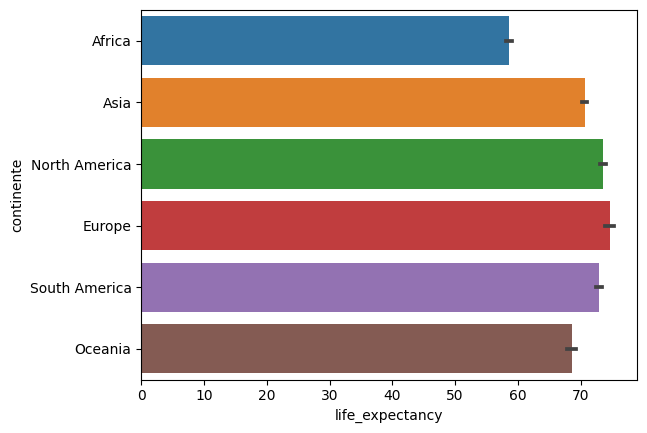

In [5]:
sns.barplot(y="continente" , data= df , x= "life_expectancy", order= ['Africa', 'Asia', 'North America', 'Europe', 'South America',
       'Oceania'] );

In [50]:
# establecemos el orden que queremos, de menos importante a más. En este caso lo haremos considerando el coeficiente 

mapa = { 'North America': 6 , 'Europe': 5 , 'South America' :4, 'Asia':3 , 'Oceania':2 ,  'Africa': 1}

In [51]:
df.insert(1, "continente_map" , df["continente"].map(mapa) )

In [52]:
df.sample(7)

,continente,continente_map,life_expectancy,adult_mortality,infant_deaths,alcohol,bmi,diphtheria,hiv_aids,gdp,income_composition_of_resources,schooling
562,North America,6,79.5,-0.41875,-0.148148,0.162457,0.710280,0.045455,0.000000,0.080011,0.538244,0.578947
250,Asia,3,65.0,0.56875,-0.148148,-0.376424,-0.520489,0.227273,0.142857,-0.032636,-2.362606,-0.657895
1958,Africa,1,54.9,1.85000,1.814815,0.873700,0.195543,-3.772727,18.928571,0.325394,-0.020774,0.315789
980,North America,6,62.7,0.56250,0.333333,0.604260,0.370956,-1.000000,0.285714,-0.361242,-0.538244,-0.684211
1275,Africa,1,61.4,0.62500,1.148148,-0.386330,-0.531991,-0.227273,0.357143,-0.301825,-0.557129,-0.710526
780,Oceania,2,68.3,0.31875,-0.185185,-0.120852,0.583753,0.272727,0.000000,0.646644,0.277620,0.578947
1706,Asia,3,81.2,-0.58750,-0.148148,1.372957,-0.902948,0.409091,0.000000,0.658736,0.726867,0.946481


In [53]:
df.columns

Index(['continente', 'continente_map', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'bmi', 'diphtheria', 'hiv_aids', 'gdp',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

## Experimentamos con el método get dummies
`En este caso no le asignamos orden a los continentes.`

In [54]:
dummies = pd.get_dummies(df["continente"], prefix_sep = "_", prefix = "continent", dtype = int)
dummies.head(3)

,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0


In [55]:
df_dummies = pd.concat([df, dummies], axis = 1)
df_dummies.head(2)

,continente,continente_map,life_expectancy,adult_mortality,infant_deaths,alcohol,bmi,diphtheria,hiv_aids,gdp,income_composition_of_resources,schooling,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,Asia,3,65.0,0.625,2.111111,-0.519069,-0.451474,-1.136364,0.0,-0.219529,-0.553352,-0.421053,0,1,0,0,0,0
1,Asia,3,59.9,0.675,2.185185,-0.519069,-0.465852,-1.272727,0.0,-0.211517,-0.564684,-0.447368,0,1,0,0,0,0


In [56]:
df_dummies.drop(columns=["continente", "continente_map"], axis=1 , inplace=True)

In [57]:
df_dummies.columns

Index(['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'bmi',
       'diphtheria', 'hiv_aids', 'gdp', 'income_composition_of_resources',
       'schooling', 'continent_Africa', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [58]:
df_dummies.to_csv('../files/endesarrollo_dummies.csv')

1.2 Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

In [59]:
df.head(2)

,continente,continente_map,life_expectancy,adult_mortality,infant_deaths,alcohol,bmi,diphtheria,hiv_aids,gdp,income_composition_of_resources,schooling
0,Asia,3,65.0,0.625,2.111111,-0.519069,-0.451474,-1.136364,0.0,-0.219529,-0.553352,-0.421053
1,Asia,3,59.9,0.675,2.185185,-0.519069,-0.465852,-1.272727,0.0,-0.211517,-0.564684,-0.447368


In [60]:
df.drop(columns=["continente"], axis=1 , inplace=True)

In [61]:
df.to_csv('../files/endesarrollo_map.csv')